# Partie pour load la data sous forme de matrice


On va tout d'abord importer tous les librairies necessaire pour faire du dnn
Numpy is used to load the data and is a library

In [ ]:
import glob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage.io import imread
from skimage.transform import resize
from sklearn.utils import shuffle
# Instantiating the model for loading the weights and biases and preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
#load la data de training
train_dataset_0_all = glob.glob('./C-NMC_Leukemia/training_data/fold_0/all/*.bmp')#data cellules malades
train_dataset_0_hem = glob.glob('./C-NMC_Leukemia/training_data/fold_0/hem/*.bmp')#data cellules saines



Un format BMP-Windows bitmap (connu aussi sous l'abréviation de BitMaP en BMP ; en anglais, device-independent bitmap ou DIB), est un format d'image matricielle ouvert 

comma-separated values (csv) apd panda qui est librairie qui permet de jouer avec les matrices et la data plus facilement

In [ ]:
valid_data = pd.read_csv(
        './C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data_labels.csv')
print(valid_data)

                Patient_ID new_names  labels
0      UID_57_29_1_all.bmp     1.bmp       1
1      UID_57_22_2_all.bmp     2.bmp       1
2      UID_57_31_3_all.bmp     3.bmp       1
3     UID_H49_35_1_hem.bmp     4.bmp       0
4      UID_58_6_13_all.bmp     5.bmp       1
...                    ...       ...     ...
1862   UID_54_33_1_all.bmp  1863.bmp       1
1863   UID_55_24_1_all.bmp  1864.bmp       1
1864  UID_H32_20_1_hem.bmp  1865.bmp       0
1865   UID_54_30_2_all.bmp  1866.bmp       1
1866   UID_66_10_3_all.bmp  1867.bmp       1

[1867 rows x 3 columns]


Creer les listes pour tous les path des images pour apres mettre les images dans les listes

In [ ]:
A = []
H = []

A.extend(train_dataset_0_all)
A.extend(train_dataset_1_all)
A.extend(train_dataset_2_all)


H.extend(train_dataset_0_hem)
H.extend(train_dataset_1_hem)
H.extend(train_dataset_2_hem)

A = np.array(A)#transforme la lsite A qui est une liste sur une seule ligne en une matrice avec 1 colone et tous les elements separé sur chaque ligne
H = np.array(H)


In [ ]:
print(A)
print(H)

['./C-NMC_Leukemia/training_data/fold_0/all\\UID_11_10_1_all.bmp'
 './C-NMC_Leukemia/training_data/fold_0/all\\UID_11_11_1_all.bmp'
 './C-NMC_Leukemia/training_data/fold_0/all\\UID_11_11_2_all.bmp' ...
 './C-NMC_Leukemia/training_data/fold_0/all\\UID_5_9_1_all.bmp'
 './C-NMC_Leukemia/training_data/fold_0/all\\UID_5_9_2_all.bmp'
 './C-NMC_Leukemia/training_data/fold_0/all\\UID_5_9_3_all.bmp']
['./C-NMC_Leukemia/training_data/fold_0/hem\\UID_H11_10_1_hem.bmp'
 './C-NMC_Leukemia/training_data/fold_0/hem\\UID_H11_10_2_hem.bmp'
 './C-NMC_Leukemia/training_data/fold_0/hem\\UID_H11_10_3_hem.bmp' ...
 './C-NMC_Leukemia/training_data/fold_0/hem\\UID_H7_7_1_hem.bmp'
 './C-NMC_Leukemia/training_data/fold_0/hem\\UID_H7_8_1_hem.bmp'
 './C-NMC_Leukemia/training_data/fold_0/hem\\UID_H7_9_1_hem.bmp']


In [ ]:
Image = []
Label = []

# Progress bar
for i in tqdm(range(0, len(A))):
    img = imread(A[i])
    img = resize(img, (128, 128)) #pk resize a 128 sur 128
    Image.append(img)
    Label.append(1)

# Progress bar
for i in tqdm(range(0, len(H))):
    img = imread(H[i])
    img = resize(img, (128, 128))
    Image.append(img)
    Label.append(0)

#Create list for the image and the label
Image = np.array(Image)
Label = np.array(Label)


100%|██████████████████████████████████████████████████████████████████████████████| 1130/1130 [00:41<00:00, 26.98it/s]


La matrice A contient toutes les cellules malades donc on attribue aux images des cellules malades le label 1.
Pour toutes les cellules saines on attribue la valeur 0 (sans maladie).
A la fin dans la matrice Image on se retrouve avec tous les images de data de cellules (malades et saines) qui sont mise en ordre (d'abord les malades et puis les saines).



In [ ]:
print(Image[1,1,1])
print(Image.shape)
print(Label)
print(Image.shape + Label.shape)


[0. 0. 0.]
(3527, 128, 128, 3)
[1 1 1 ... 0 0 0]
(3527, 128, 128, 3, 3527)


In [ ]:
Image, Label = shuffle(Image, Label, random_state=40) 

random state cest une cle pour si on veut refaire le code et avoir les meme resultat on doit mette cette cle si on la met pas a chque lancement on peut avoir des valeurs differentes

Comme on a dit que les images n'etaient pas melangé il faut les melanger parce que si on les laisse comme ca le programme va tres bien apprendre a reconaitre les cellules malade et quand il devra dire qu'une cellules n'est pas malade il pourrait la classifier de malade parce qu'il a été entrainer a reconaitre seulement les cellules malades


100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 390.17it/s]


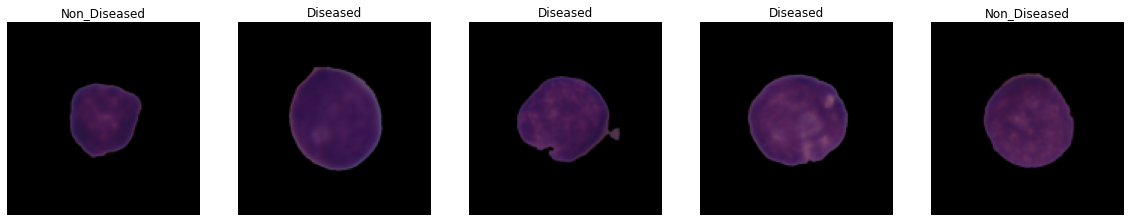

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 20))
for i in tqdm(range(0, 5)):
    rand = np.random.randint(len(Image))
    ax[i].imshow(Image[rand])
    ax[i].axis('off')
    a = Label[rand]
    if a == 1:
        ax[i].set_title('Diseased')
    else:
        ax[i].set_title('Non_Diseased')

La librairie tqdm permet de voir la progression d'une boucle for par une barre qui charge

In [ ]:
X = Image
y = Label

In [ ]:
#print(X)
print(y)

[0 1 1 ... 1 1 0]


In [ ]:

del Image
del Label
del A
del H


In [ ]:
valid_data.head()
#print(type(valid_data))

,Patient_ID,new_names,labels
0,UID_57_29_1_all.bmp,1.bmp,1
1,UID_57_22_2_all.bmp,2.bmp,1
2,UID_57_31_3_all.bmp,3.bmp,1
3,UID_H49_35_1_hem.bmp,4.bmp,0
4,UID_58_6_13_all.bmp,5.bmp,1


La fonction .head() permet d'afficher que les 5 premier elements de la liste valid_data si on veut visualiser les n premier elements on met entre paranthese le nombre désiré

In [ ]:
X_val = []

for image_name in valid_data.new_names:
    # Loading images
    img = imread(
        './C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data/' + image_name)
    # Resizing
    img = resize(img, (128, 128))
    # Appending them into list
    X_val.append(img)

# Converting into array
X_val = np.array(X_val)

In [ ]:
#print(X_val)

In [ ]:
 y_val = valid_data.labels.values

In [ ]:
print(y_val)

[1 1 1 ... 0 1 1]


# Augmentation et preprocessing

In [ ]:
train_datagen = ImageDataGenerator(horizontal_flip=True,
                                   vertical_flip=True,
                                   zoom_range=0.2,
                                   preprocessing_function=preprocess_input)
#mettre un filtre gaussien ou bien un qui ne garde que les bords
train_datagen.fit(X)

valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

valid_datagen.fit(X_val)


Ce sont de fonction de la librairie tenserflow qui permet de normaliser les images et qui permet de diviser la data dans des batch pour mieux ameliorer le model (on calcule l'erreur par batch).
On va flip quelques images mais aussi les zommer pour que le programme soit capable de tout reconnaitre et pas que certaines position des images (generalisation).


# Creation du modele de reseau de neurones

In [ ]:
#incep_v3 = InceptionV3(include_top=False, weights='imagenet', input_shape=(128, 128, 3))

# Model Summary

#incep_v3.summary()

#ceci est un modele qui utilise une fonction prefait avec beaucoup de layer 

https://keras.io/api/applications/inceptionv3/

https://keras.io/examples/vision/3D_image_classification/

In [ ]:
#ceci est un model ou je fait une fonction qui permet de creer de layers differents que j'ai transformé pour faire de la 2D

shape=(128,128,3)

def get_model(shape):
    """Build a 3D convolutional neural network model."""

    inputs = keras.Input(shape)
    x = layers.Conv2D(32, 3, strides=2, padding="same")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(64, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [128]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.Flatten()(x)
    x = layers.Dense(16,activation="relu")(x)
    outputs = layers.Dense(2, activation="softmax")(x)#pourqoui utiliser softmax ou sigmoid
    return keras.Model(inputs, outputs)


# Build model.
model = get_model(shape)
model.summary()



Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 64, 64, 32)   896         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_10 (BatchNo (None, 64, 64, 32)   128         conv2d_6[0][0]                   
__________________________________________________________________________________________________
activation_10 (Activation)      (None, 64, 64, 32)   0           batch_normalization_10[0][0]     
_______________________________________________________________________________________

On met l'optimisation qui est la maniere dont on calcule le gradient qui va etre backpropagated dans tout le reseau et modifie les poids/weight layer par layer

In [ ]:
initial_learning_rate = 0.0001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
    metrics=["acc"],
)


filepath = './best_weights.hdf5'

earlystopping = EarlyStopping(monitor='val_acc',#changer et mettre val_acc parce qu'il reconnait pas val_accuracy
                              mode='max',
                              patience=15,
                              verbose=1)

checkpoint = ModelCheckpoint(filepath,
                             monitor='val_acc',
                             mode='max',
                             save_best_only=True,
                             verbose=1)



callback_list = [ checkpoint, earlystopping]

# Fitting Model



In [ ]:
print(X.shape)
print(y.shape)
print(y[1])

(3527, 128, 128, 3)
(3527,)
1


J'ai eu un problem car j'avais un model un 3D et mon porjet se base sur un model en 2D
Un autre problem c'etait que sur le model repris sur internet il aait un seul output tandis que moi j'ai 2 outputs (malade sain) 
3e probleme le nombre de batch sur le model est de 64 et sur le code endessous j'avais pris un batch plus petit. les 2 batch ce qu'il recoit et ce qu'il valide doit etre de al meme taille

In [ ]:
model_history = model.fit(x=X,y= y,  # BATCH DE 10 15 images generalement
                          validation_data=(X_val, y_val),
                          epochs=5,
                          batch_size=10,
                          verbose=1,
                          callbacks=callback_list)
print(model_history)


Epoch 1/5
353/353 [==============================] - ETA: 0s - loss: 3.8232 - acc: 0.7499
Epoch 00001: val_acc improved from -inf to 0.65292, saving model to .\best_weights.hdf5
353/353 [==============================] - 506s 1s/step - loss: 3.8232 - acc: 0.7499 - val_loss: 1.0356 - val_acc: 0.6529
Epoch 2/5
353/353 [==============================] - ETA: 0s - loss: 0.6177 - acc: 0.8537
Epoch 00002: val_acc improved from 0.65292 to 0.68934, saving model to .\best_weights.hdf5
353/353 [==============================] - 536s 2s/step - loss: 0.6177 - acc: 0.8537 - val_loss: 1.7361 - val_acc: 0.6893
Epoch 3/5
353/353 [==============================] - ETA: 0s - loss: 0.3432 - acc: 0.9042
Epoch 00003: val_acc did not improve from 0.68934
353/353 [==============================] - 564s 2s/step - loss: 0.3432 - acc: 0.9042 - val_loss: 1.4481 - val_acc: 0.6872
Epoch 4/5
353/353 [==============================] - ETA: 0s - loss: 0.2712 - acc: 0.9251
Epoch 00004: val_acc did not improve from 0.6

# Visualizing model performance


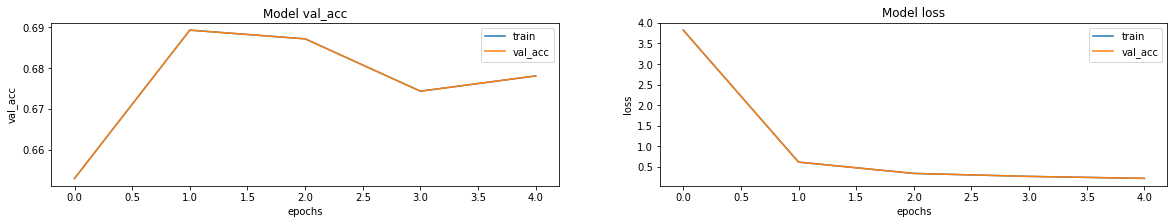

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 3))
ax = ax.ravel()

for i, metric in enumerate(["val_acc", "loss"]):
    ax[i].plot(model.history.history[metric])
    ax[i].plot(model.history.history[metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val_acc"])


google colab
